In [1]:
import numpy as np


In [2]:
# Generate data
def identical_populations(n_samples):
    gender = np.random.choice(2, size = n_samples)
    age = 18 + 60*np.random.beta(3,4, size = n_samples) 
    salary = 100 + np.random.exponential(100, size = n_samples)
    return gender, age, salary

In [3]:
# Generate data
def different_populations(n_samples):
    gender = np.random.choice(2, size = n_samples)
    age = 18 + 60*np.random.beta(3,4, size = n_samples) 
    salary = 100*(1 + 0.1*gender)* np.random.exponential(100, size = n_samples)
    return gender, age, salary

In [64]:
# Generate data
def age_dependence(n_samples):
    age = 18 + 60*np.random.beta(3,4, size = n_samples)
    gender = np.zeros(n_samples)
    for t in range(n_samples):
        p_man = age[t] / 78
        gender[t] = np.random.choice(2, p = [1 - p_man, p_man])
    salary = age* np.random.exponential(100, size = n_samples)
    return gender, age, salary

195.30976776908258 202.30562095025425


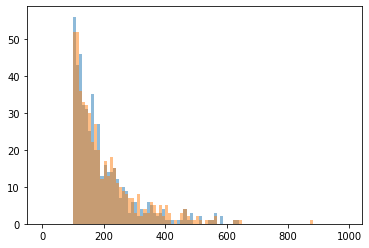

In [62]:
n_samples = 1000
import matplotlib.pyplot as plt
gender, age, salary = identical_populations(n_samples)
plt.hist(salary[gender==0], alpha = 0.5, bins = np.arange(100)*10)
plt.hist(salary[gender==1], alpha = 0.5, bins = np.arange(100)*10)
print(np.mean(salary[gender==0]), np.mean(salary[gender==1]))

(array([0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 2., 0., 0., 0., 0.,
        1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
        1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 2.,
        0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
        1., 1., 0., 0., 1., 1., 0., 1., 1., 2., 1., 1., 1., 0.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
        260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380,
        390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510,
        520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640,
        650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770,
        780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900,
        910, 920, 930, 940, 950, 960, 970, 

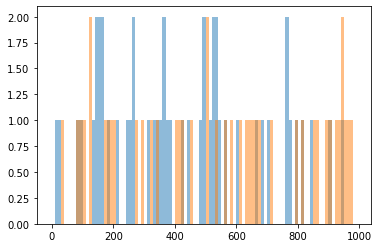

In [6]:
gender, age, salary = different_populations(n_samples)
plt.hist(salary[gender==0], alpha = 0.5, bins = np.arange(100)*10)
plt.hist(salary[gender==1], alpha = 0.5, bins = np.arange(100)*10)

In [7]:
print(np.mean(salary[gender==0]), np.mean(salary[gender==1]))

9566.70986455853 11449.439392567327


In [8]:
# simulation to see how how our estimates vary
n_simulations = 1000
mean_women = np.zeros(n_simulations)
mean_men = np.zeros(n_simulations)

(array([  9.,  49., 157., 273., 236., 156.,  79.,  27.,   8.,   6.]),
 array([ 6676.17941126,  7702.97375015,  8729.76808904,  9756.56242793,
        10783.35676681, 11810.1511057 , 12836.94544459, 13863.73978348,
        14890.53412237, 15917.32846126, 16944.12280015]),
 <BarContainer object of 10 artists>)

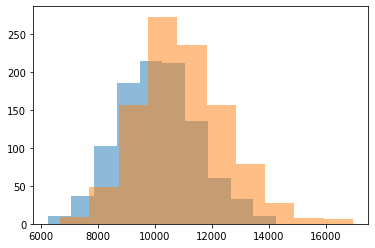

In [12]:
# plot the histogram over simulations!
n_samples = 100
for t in range(n_simulations):
    gender, age, salary = different_populations(n_samples)
    # the folllowing is what we actually calculate in our method
    mean_women[t] = np.mean(salary[gender==0])
    mean_men[t] = np.mean(salary[gender==1])
plt.hist(mean_women, alpha = 0.5)
plt.hist(mean_men, alpha = 0.5)

# Bootstrapping

How can we measure variability with only one dataset?
The simple answer is to generate more dasets from the original one.
In particular, if we have a dataset $D$, we create $n$ bootstrap replicates of the original as follows.

For replicate $D_i$, we first sample $k = |D|$ indices from the uniform distribution on $k$ with replacement. The entries of $D_i$ are then the entries of the original dataset, sometimes appearing once, some times never, some times more than once.


In [13]:
# Now do a bootstrap sample 
gender, age, salary = identical_populations(n_samples)
data = np.array([gender, age, salary]).transpose()


In [14]:
print(np.mean(data[data[:,0]==0]), # pick rows where gender (attribute 0) is zero
      np.mean(data[data[:,0]==1])) # pick rows where gender (attribute 0) is one

78.2043383531025 86.0616653564288


In [15]:
idx = np.random.choice(n_samples, size=n_samples)

In [16]:
data[idx] # a bootstrap sample

array([[  1.        ,  25.9133738 , 105.38717405],
       [  0.        ,  35.13181201, 318.53778264],
       [  1.        ,  29.80751511, 190.73572778],
       [  0.        ,  48.51833246, 486.55075004],
       [  0.        ,  33.06640055, 204.62230443],
       [  0.        ,  42.84773292, 211.35795575],
       [  1.        ,  56.21226852, 101.65064926],
       [  1.        ,  49.64564868, 251.20359943],
       [  1.        ,  45.72893586, 109.22851555],
       [  0.        ,  42.84773292, 211.35795575],
       [  1.        ,  29.79143029, 131.03128316],
       [  1.        ,  55.69927874, 129.58918343],
       [  0.        ,  32.90983932, 194.27595021],
       [  1.        ,  31.53125774, 206.19350501],
       [  1.        ,  61.04838047, 456.47673523],
       [  0.        ,  46.55349518, 104.63738153],
       [  0.        ,  40.36736032, 217.97626875],
       [  1.        ,  35.85386806, 157.50379895],
       [  0.        ,  45.97734879, 189.82581368],
       [  1.        ,  27.64484

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcdefc08700>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcdef622100>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcdefc08250>,
 'medians': [<matplotlib.lines.Line2D at 0x7fcdef622790>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fcdef622b80>,
 'means': []}

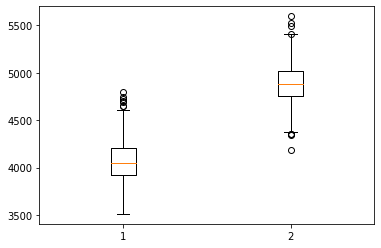

In [71]:
# plot the histogram over bootstrap samples!
n_samples = 1000
gender, age, salary = age_dependence(n_samples)
data = np.array([gender, age, salary]).transpose()
for t in range(n_simulations):
    # get a bootstrap sample
    data_bs = data[np.random.choice(n_samples, size=n_samples)]
    salary = data_bs[:,2]
    gender = data_bs[:,0]
    age = data_bs[:,1]
    # the folllowing is what we actually calculate in our method
    mean_women[t] = np.mean(salary[gender==0])
    mean_men[t] = np.mean(salary[gender==1])

plt.boxplot([mean_women, mean_men])

(array([  2.,  15.,  68., 167., 265., 260., 140.,  65.,  16.,   2.]),
 array([-1371.24946823,  -938.03277082,  -504.81607342,   -71.59937601,
          361.6173214 ,   794.8340188 ,  1228.05071621,  1661.26741362,
         2094.48411103,  2527.70080843,  2960.91750584]),
 <BarContainer object of 10 artists>)

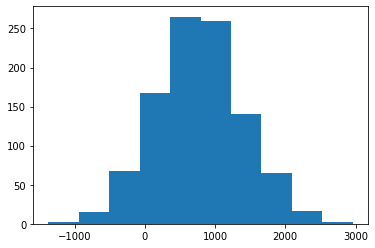

In [53]:
plt.hist(mean_men - mean_women)

(array([ 20.,  70., 176., 242., 246., 147.,  72.,  23.,   3.,   1.]),
 array([ 8767.07190151,  9033.34528084,  9299.61866016,  9565.89203948,
         9832.16541881, 10098.43879813, 10364.71217746, 10630.98555678,
        10897.2589361 , 11163.53231543, 11429.80569475]),
 <BarContainer object of 10 artists>)

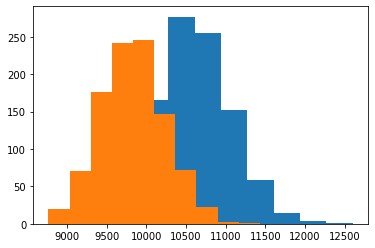

In [54]:
plt.hist(mean_men)
plt.hist(mean_women)

In [55]:
mean_men.sort()
mean_women.sort()

In [56]:
mean_men[100], mean_men[900]

(10024.964123700584, 11225.75030244746)

In [57]:
mean_women[100], mean_women[900]

(9327.436692435234, 10363.779264899871)

In [58]:
if (mean_women[int(0.9*n_simulations)]) < (mean_men[int(0.1*n_simulations)]):
    print("Inequality detected")

In [59]:
?plt.boxplot

In [65]:
n_samples = 1000
gender, age, salary = age_dependence(n_samples)


(array([335., 134.,  44.,  24.,  14.,   3.,   1.,   2.,   2.,   1.]),
 array([1.99841329e-01, 4.02506503e+03, 8.04993023e+03, 1.20747954e+04,
        1.60996606e+04, 2.01245258e+04, 2.41493910e+04, 2.81742562e+04,
        3.21991214e+04, 3.62239866e+04, 4.02488518e+04]),
 <BarContainer object of 10 artists>)

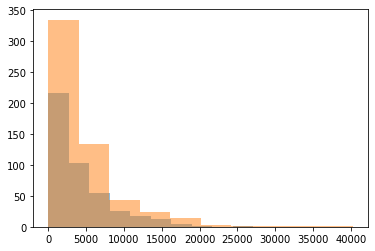

In [70]:
plt.hist(salary[gender==0], alpha = 0.5)
plt.hist(salary[gender==1], alpha = 0.5)

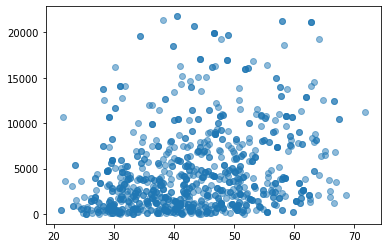

In [73]:
plt.scatter(age, salary, alpha=0.5)